In [5]:
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np

In [54]:
class Clasficador:
    def __init__(self):
        self.X = None #variable caracteristica
        self.Y = None #variable objetivo
        self.theta = None # pesos
        self.historial = []
    
    def fit(self, x, y):
        m, n = x.shape
        unidad_sesgo = np.ones((m,1))
        self.X = np.append(unidad_sesgo, x, axis=1)
        self.Y = y.reshape(-1, 1)
        self.theta = np.zeros(n + 1)
    
    def graficar(self):
        indices_pos = np.where(self.Y == 1)[0]
        indices_neg = np.where(self.Y == 0)[0]
        pl.scatter(self.X[indices_neg, 1], self.X[indices_neg, 2], color = 'blue') #scateo todas las filas de la primeracolumna, y todas las filas de la segunda columna
        pl.scatter(self.X[indices_pos, 1], self.X[indices_pos, 2], color = 'red')
        pl.grid()
    
    def get_sigmoide(self, z):
        return 1/(1+np.exp(-z))
    
    def get_j(self, t):
        t = t.reshape(-1, 1)
        m, n = self.X.shape
        h = self.get_sigmoide(self.X.dot(t))
        j = 1 / m * (-np.log(h).T.dot(self.Y) + (np.log(1 - h).T.dot(self.Y - 1)))
        return j.sum()

    def get_gradiente(self, t):
        t = t.reshape(-1, 1)
        m, n = self.X.shape
        h = self.get_sigmoide(self.X.dot(t))
        grad = 1 / m * self.X.T.dot(h - self.Y)
        return grad.flatten()
    
    def normalizar(self):
        mu = self.X[:,1:].mean(0)
        sigma = self.X[:,1:].std(0)
        self.X[:,1:] = (self.X[:,1:] - mu) / sigma

    
    def descenso_gradiente(self, alpha, itera=None, epsilon=1.e-4):
        cont = 0
        while True:
            self.historial.append(self.get_j(self.theta))
            self.theta = self.theta - alpha * self.get_gradiente(self.theta)
            if abs(self.get_j(self.theta) - self.historial[-1]) < epsilon:
                break
            if itera is not None:
                if cont >= itera:
                    break
            cont = cont + 1



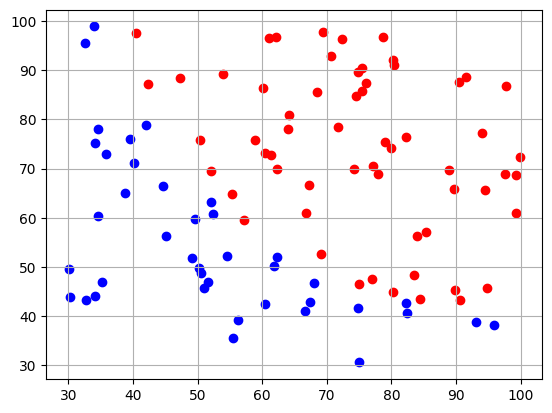

In [55]:
data = np.loadtxt("datos03.txt", delimiter=',')
l = Clasficador()
l.fit(data[:, 0:-1], data[:, -1])
l.graficar()

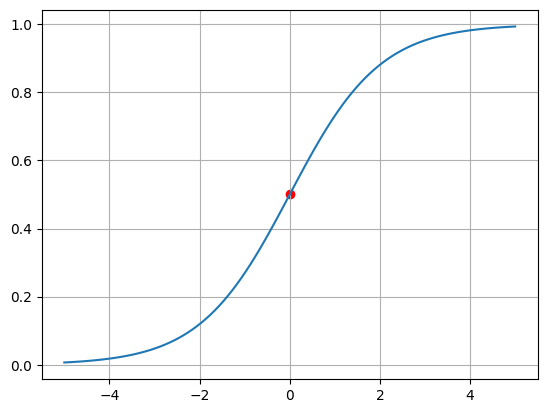

In [56]:
z  = np.linspace(-5, 5, 100)
g = l.get_sigmoide(z)
pl.plot(z, g)
pl.scatter(0, 0.5, c='red')
pl.grid()

In [57]:
l.get_j(np.zeros(3))

0.6931471805599453

In [58]:
l.get_gradiente(np.zeros(3))

array([ -0.1       , -12.00921659, -11.26284221])

In [59]:
l.normalizar()

In [60]:
l.descenso_gradiente(0.01)

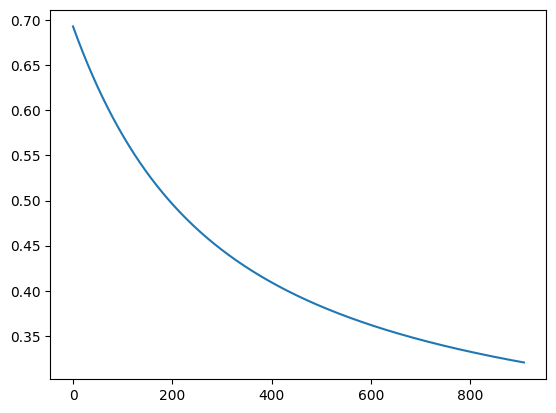

In [62]:
pl.plot(range(len(l.historial)), l.historial)